# Rain Prediction Using Machine Learning

### Name: Achanta Venkata Anand
### Roll Number: 2201009
### Section: CS31
### Course Code: CS306

## 1. Problem Statement

This project aims to develop a machine learning model to predict rainfall occurrence for the next day based on various meteorological parameters. The prediction is formulated as a binary classification problem where the model predicts whether it will rain tomorrow (Yes/No) based on weather conditions like temperature, humidity, pressure, and cloud cover.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

## Data Pre-Processing
The project uses the Australian Weather Dataset, which contains daily weather observations from numerous Australian weather stations. The dataset includes various meteorological features such as:

- **Temperature** (9am and 3pm)
- **Humidity** (9am and 3pm)
- **Pressure** (9am and 3pm)
- **Cloud cover** (9am and 3pm)
- **Rainfall**

**Target variable:** `RainTomorrow` (Yes/No)



In [2]:
df = pd.read_csv("weatherAUS.csv")

### Data Preprocessing Steps

- **Selected relevant features** for prediction.
- **Converted the target variable** into binary format (0/1).
- **Handled missing values** by dropping incomplete records.
- **Standardized numerical features** using `StandardScaler`.

In [3]:
features = ['Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                'RainTomorrow']
df = df[features]

In [4]:
df['RainTomorrow'] = (df['RainTomorrow'] == 'Yes').astype(int)
df_processed = df.dropna()

## Data Analysis

### Feature Distributions

- **Analysis of distribution patterns** for each weather parameter.
- **Identification of outliers** and unusual patterns.
- **Normal distribution tests** for key features.

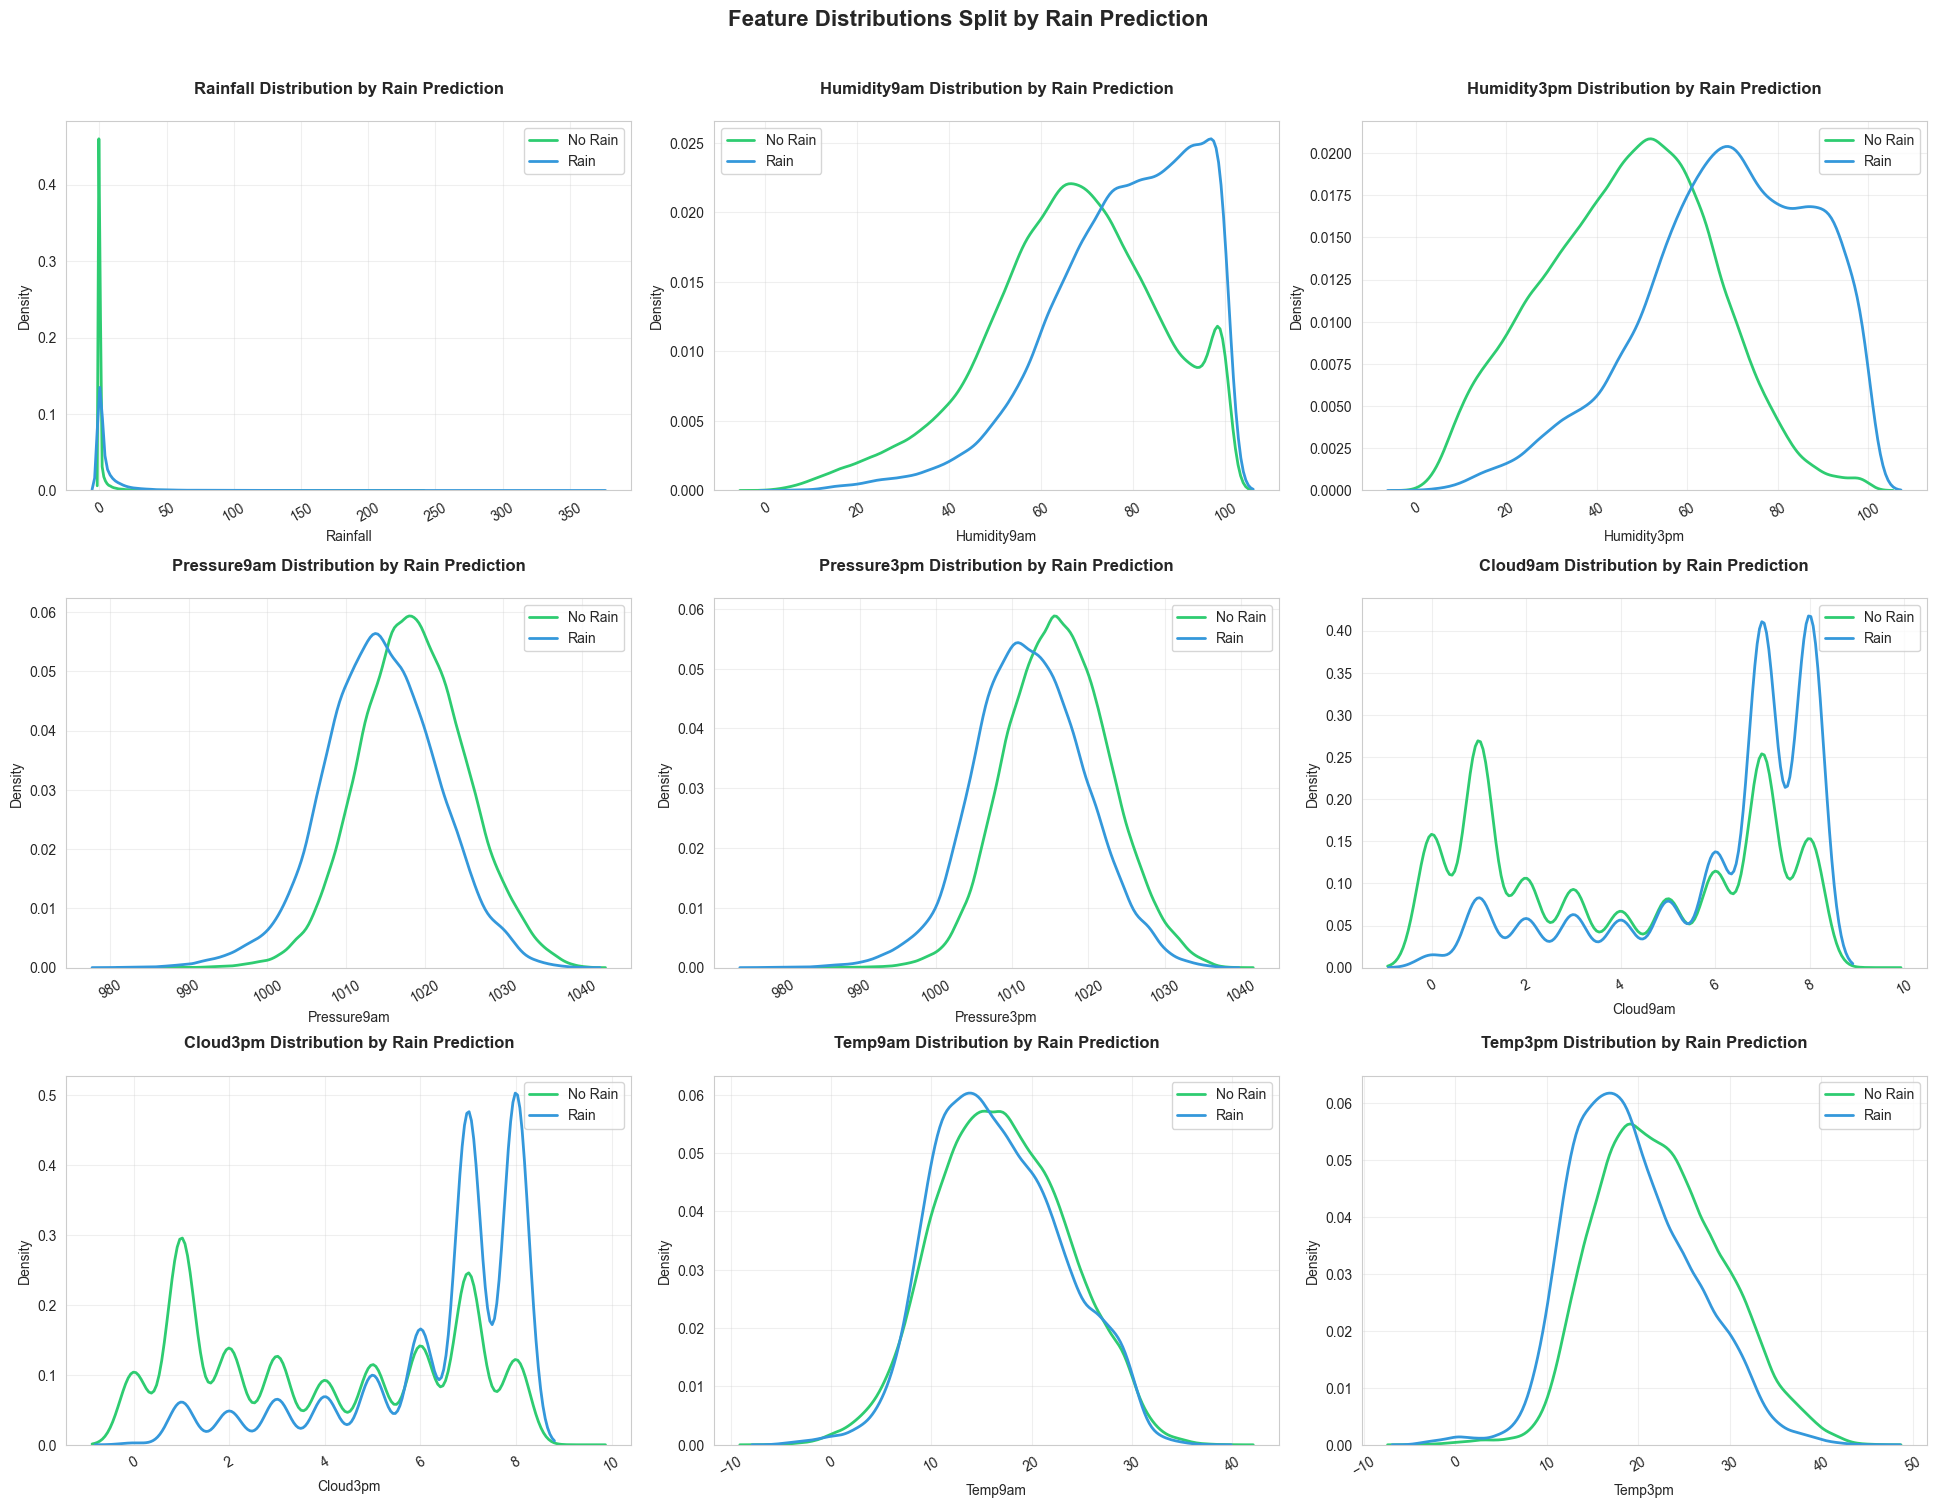

In [5]:
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99',
          '#FF99CC', '#99FFCC', '#FFB366', '#99FF99', '#FF99FF']

plt.figure(figsize=(20, 15))

for i, (feature, color) in enumerate(zip(features, colors), 1):
    plt.subplot(3, 3, i)

    sns.kdeplot(data=df[df['RainTomorrow'] == 0][feature],
                color='#2ecc71',
                label='No Rain',
                linewidth=2)
    sns.kdeplot(data=df[df['RainTomorrow'] == 1][feature],
                color='#3498db',
                label='Rain',
                linewidth=2)

    plt.title(f'{feature} Distribution by Rain Prediction',
              pad=20,
              fontsize=12,
              fontweight='bold')
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=30)

plt.tight_layout(pad=3.0, h_pad=0.8, w_pad=0.8)
plt.suptitle('Feature Distributions Split by Rain Prediction',
             fontsize=16,
             fontweight='bold',
             y=1.02)

plt.show()


### Correlation Analysis

- **Heatmap visualization** of feature correlations.


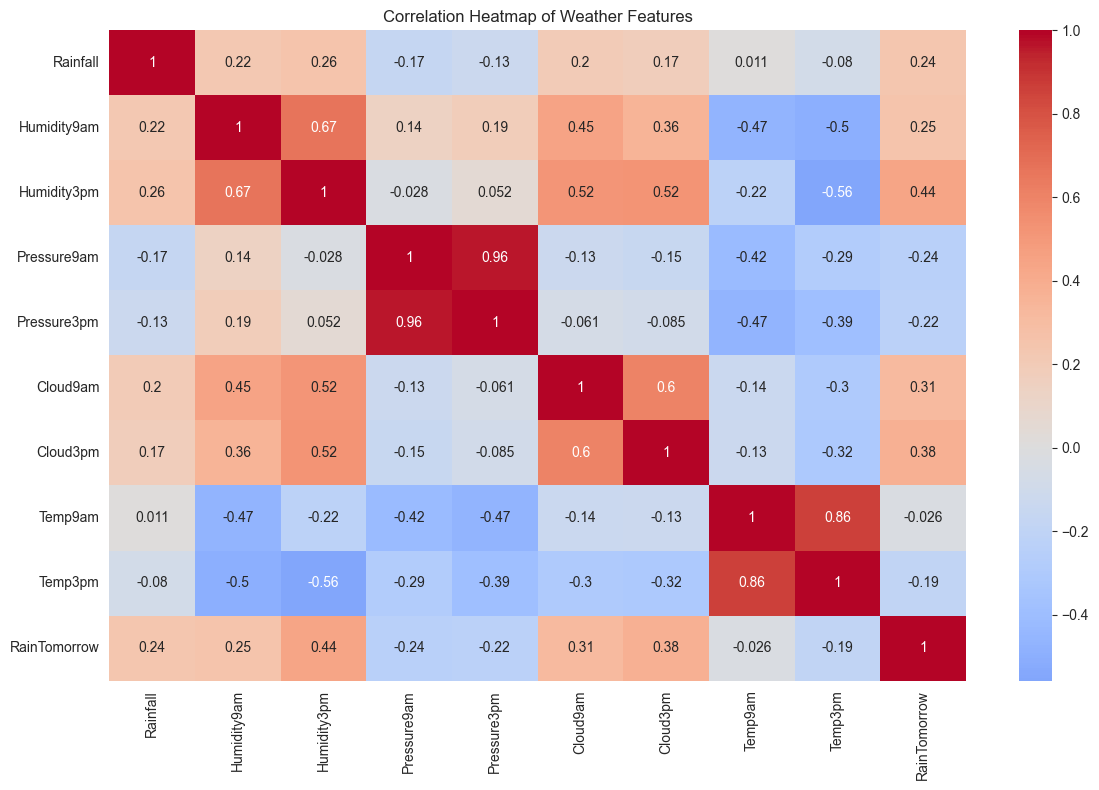

In [6]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Weather Features')
plt.tight_layout()
plt.show()

### Weather Patterns

- **Rainfall distribution** patterns.


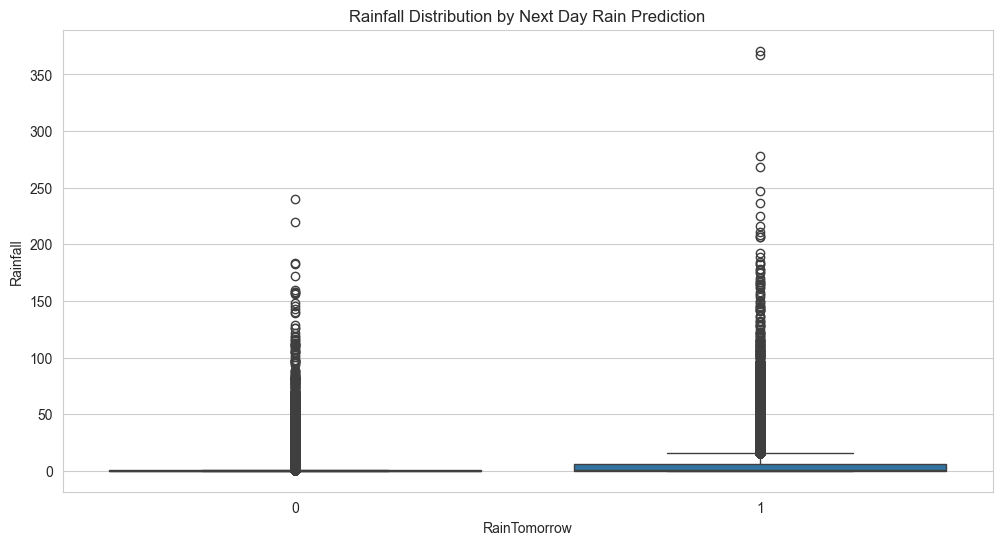

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title('Rainfall Distribution by Next Day Rain Prediction')
plt.show()

- **Temperature-Humidity relationship** analysis.

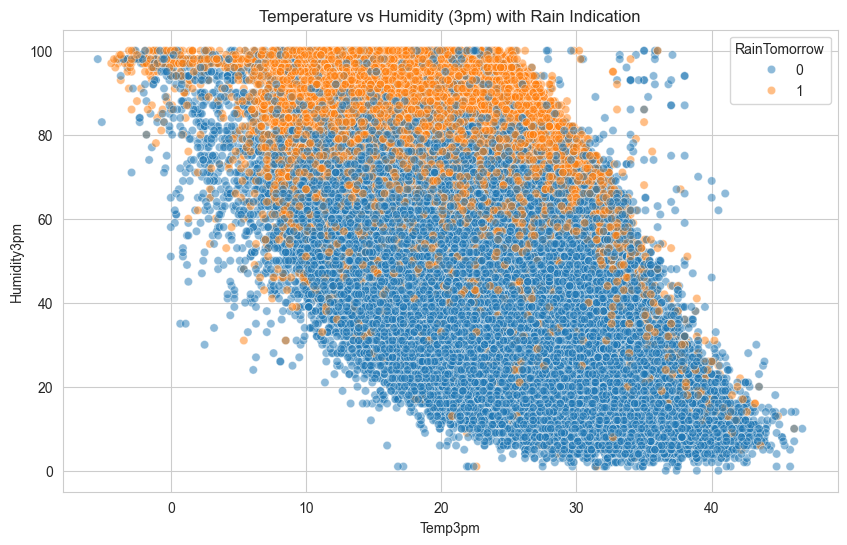

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp3pm', y='Humidity3pm', hue='RainTomorrow', alpha=0.5)
plt.title('Temperature vs Humidity (3pm) with Rain Indication')
plt.show()

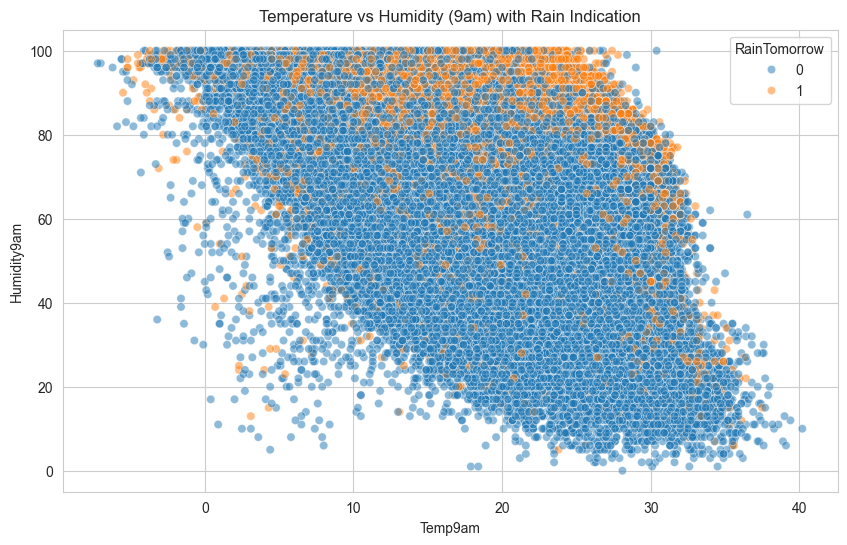

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp9am', y='Humidity9am', hue='RainTomorrow', alpha=0.5)
plt.title('Temperature vs Humidity (9am) with Rain Indication')
plt.show()

### Model Training


### Random Forest
- **Split data** into 80% training and 20% testing sets.
- **Used 100 trees** in the Random Forest ensemble.
- **Applied standard hyperparameters** with potential for future optimization.


In [10]:
X = df_processed.drop(['RainTomorrow', 'Rainfall'], axis=1)
y = df_processed['RainTomorrow']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Performance
### Random Forest
- **Accuracy:** Approximately 85% on the test set.
- **Detailed metrics** including precision, recall, and F1-score for both classes.
- **Confusion matrix** showing the distribution of predictions.


In [14]:
y_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [15]:
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)


Model Performance:
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12037
           1       0.71      0.52      0.60      3600

    accuracy                           0.84     15637
   macro avg       0.79      0.73      0.75     15637
weighted avg       0.83      0.84      0.83     15637


Confusion Matrix:
[[11295   742]
 [ 1740  1860]]


### ROC curve for Random Forest

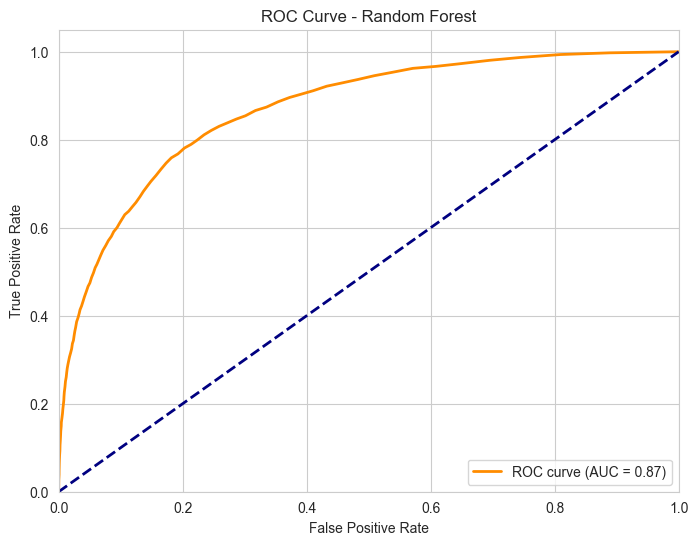

In [16]:
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

### Feature Importance
### Random Forest
The model revealed the following features as most important for prediction:

- **Humidity3pm**
- **Pressure3pm**
- **Temp3pm**
- **Cloud3pm**


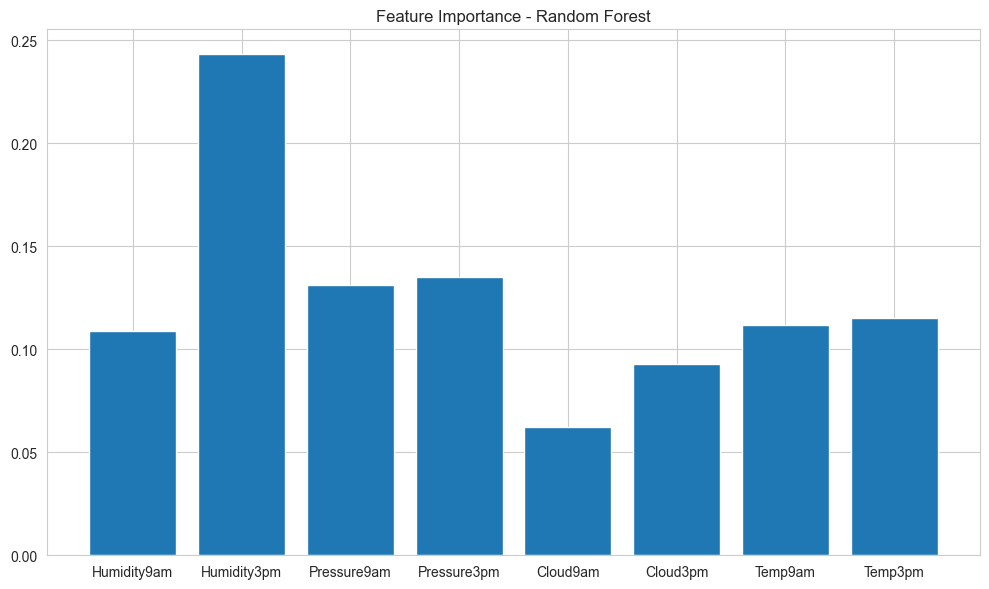

In [17]:
importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importance)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

### Model Training
### Logistic Regression

- **Split data** into 80% training and 20% testing sets.
- **Performance Evaluation:** The model’s performance is evaluated using accuracy (`accuracy_score`) and a detailed classification report (`classification_report`), which includes metrics like precision, recall, and F1-score.


In [18]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### Model Performance
- **Accuracy:** Approximately 85% on the test set.
- **Performance Evaluation:** The model’s performance is evaluated using accuracy (`accuracy_score`) and a detailed classification report (`classification_report`), which includes metrics like precision, recall, and F1-score.


In [19]:
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

In [20]:
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Logistic Regression Performance:
Accuracy: 0.834

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     12037
           1       0.69      0.50      0.58      3600

    accuracy                           0.83     15637
   macro avg       0.78      0.72      0.74     15637
weighted avg       0.82      0.83      0.82     15637


Confusion Matrix:
[[11295   742]
 [ 1740  1860]]


### ROC Curve for Logistic Regression

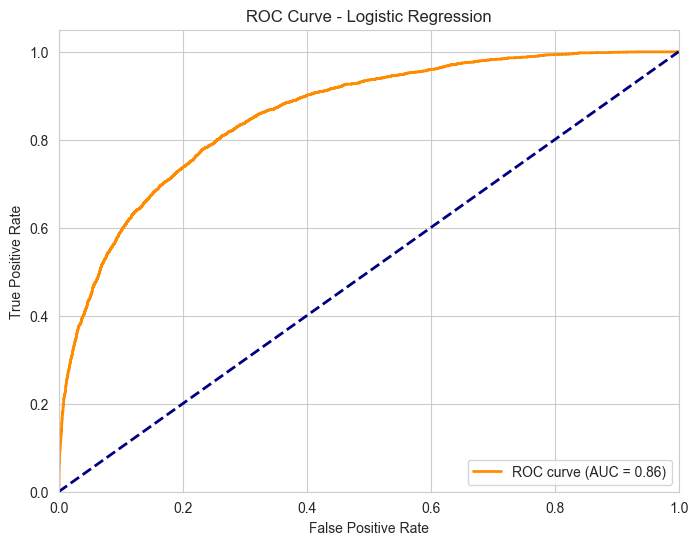

In [21]:
fpr, tpr, _ = roc_curve(y_test, lr_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Feature Importance
### Logistic Regression
The model revealed the following features as most important for prediction:

- **Humidity3pm**
- **Pressure3pm**
- **Temp3pm**
- **Cloud3pm**

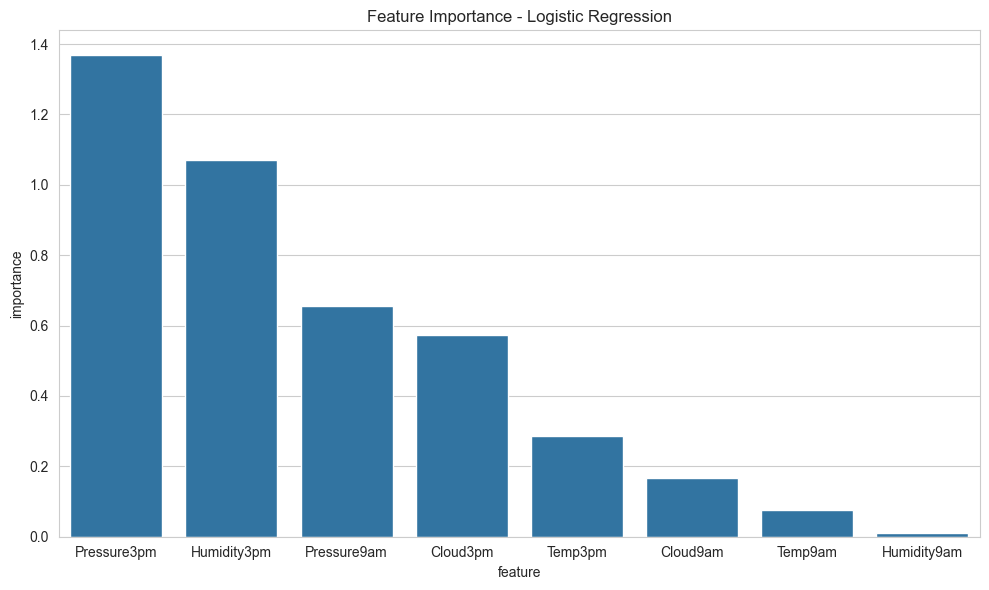

In [22]:
plt.figure(figsize=(10, 6))
lr_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(lr_model.coef_[0])
}).sort_values('importance', ascending=False)
sns.barplot(x='feature', y='importance', data=lr_importance)
plt.title('Feature Importance - Logistic Regression')
plt.tight_layout()
plt.show()

## Model Comparison
### Random Forest vs Logistic Regression

In [23]:
models = {
    'Random Forest': rf_model,
    'Logistic Regression': lr_model
}

cv_results = []
for name, model in models.items():
    if name != 'Logistic Regression':
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        cv_results.append({
        'Model': name,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test Accuracy': accuracy_score(y_test,
            model.predict(X_test))
        })
    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
        cv_results.append({
            'Model': name,
            'CV Mean': cv_scores.mean(),
            'CV Std': cv_scores.std(),
            'Test Accuracy': accuracy_score(y_test,
                model.predict(X_test_scaled))
        })

cv_df = pd.DataFrame(cv_results)

In [24]:
print("\nModel Comparison:")
print(cv_df)


Model Comparison:
                 Model   CV Mean    CV Std  Test Accuracy
0        Random Forest  0.837834  0.001776       0.841274
1  Logistic Regression  0.833741  0.001916       0.834175


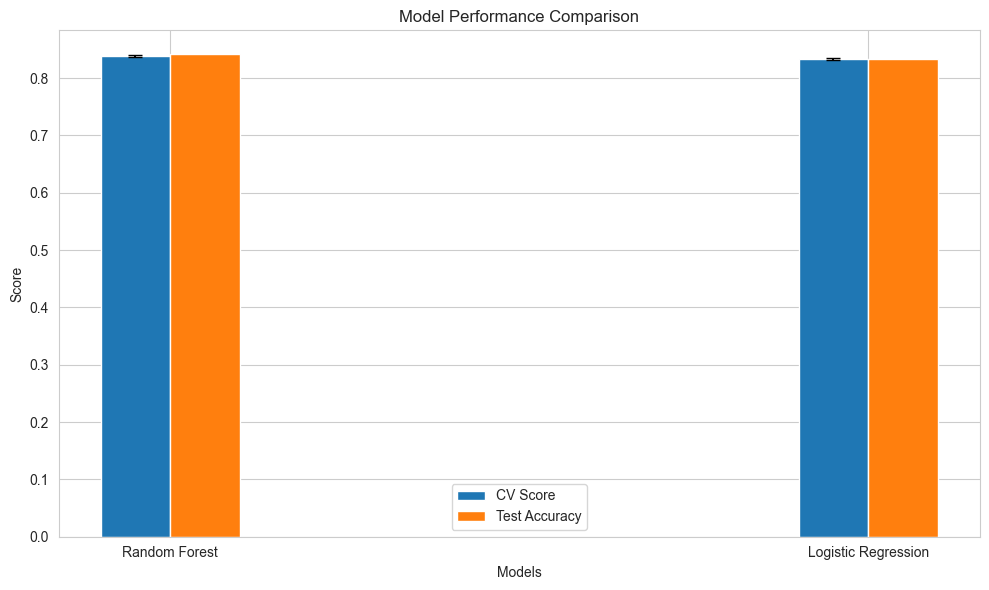

In [25]:
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.1

plt.bar(x - width/2, cv_df['CV Mean'], width, label='CV Score',
        yerr=cv_df['CV Std'], capsize=5)
plt.bar(x + width/2, cv_df['Test Accuracy'], width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, cv_df['Model'])
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix

In [26]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Rain', 'Rain'],
                yticklabels=['No Rain', 'Rain'])
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

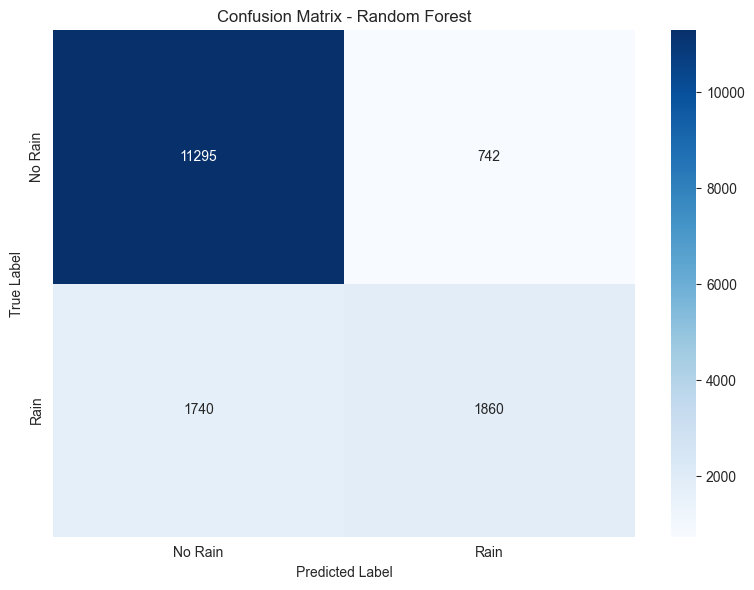

In [27]:
rf_cm = confusion_matrix(y_test, rf_model.predict(X_test))
plot_confusion_matrix(rf_cm, 'Random Forest')

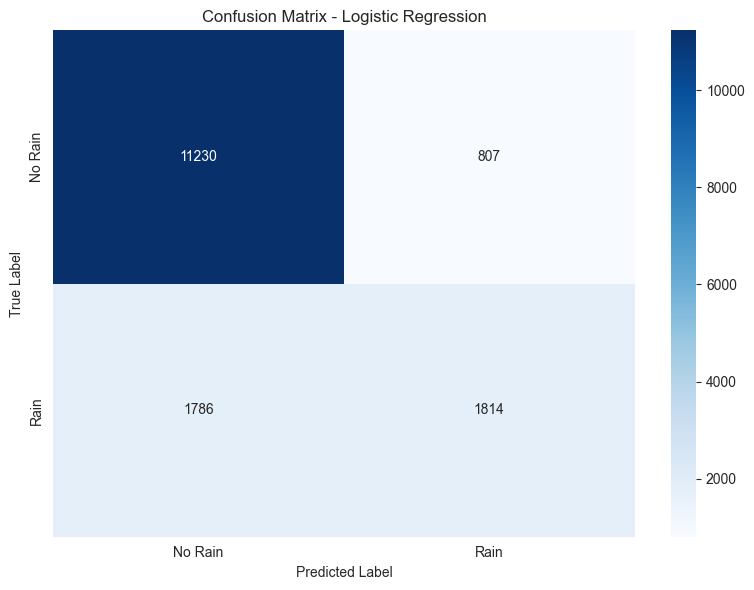

In [28]:
lr_cm = confusion_matrix(y_test, lr_model.predict(X_test_scaled))
plot_confusion_matrix(lr_cm, 'Logistic Regression')

# Cross Validation
### Implemented to  demonstrate model stability

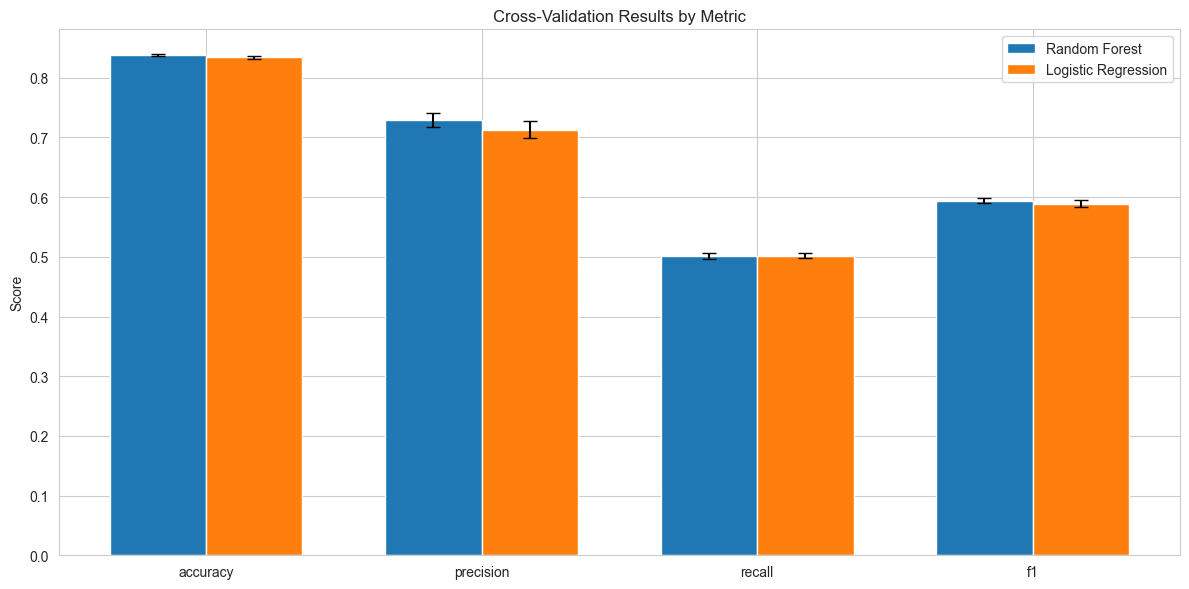

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

def perform_cross_validation(model, X, y, is_scaled=False, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    }

    for train_idx, val_idx in kf.split(X):
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y[train_idx], y[val_idx]

        if is_scaled:
            scaler = StandardScaler()
            X_train_cv = scaler.fit_transform(X_train_cv)
            X_val_cv = scaler.transform(X_val_cv)

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val_cv)

        scores['accuracy'].append(accuracy_score(y_val_cv, y_pred))
        scores['precision'].append(precision_score(y_val_cv, y_pred))
        scores['recall'].append(recall_score(y_val_cv, y_pred))
        scores['f1'].append(f1_score(y_val_cv, y_pred))

    return {metric: (np.mean(values), np.std(values))
            for metric, values in scores.items()}

X_np = X_train.to_numpy()
y_np = y_train.to_numpy()
X_scaled_np = X_train_scaled

rf_cv_scores = perform_cross_validation(rf_model, X_np, y_np)
lr_cv_scores = perform_cross_validation(lr_model, X_scaled_np, y_np, is_scaled=True)

def plot_cv_results(rf_scores, lr_scores):
    metrics = list(rf_scores.keys())

    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(metrics))
    width = 0.35

    rf_means = [rf_scores[m][0] for m in metrics]
    rf_stds = [rf_scores[m][1] for m in metrics]
    ax.bar(x - width/2, rf_means, width, label='Random Forest',
           yerr=rf_stds, capsize=5)

    lr_means = [lr_scores[m][0] for m in metrics]
    lr_stds = [lr_scores[m][1] for m in metrics]
    ax.bar(x + width/2, lr_means, width, label='Logistic Regression',
           yerr=lr_stds, capsize=5)

    ax.set_ylabel('Score')
    ax.set_title('Cross-Validation Results by Metric')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_cv_results(rf_cv_scores, lr_cv_scores)

# Model Rendering

### Going with Random forest as it preforms well than Logistic Regression

In [30]:
import pickle

with open("rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)


In [31]:
with open("lr_model.pkl", "wb") as file:
    pickle.dump(lr_model, file)